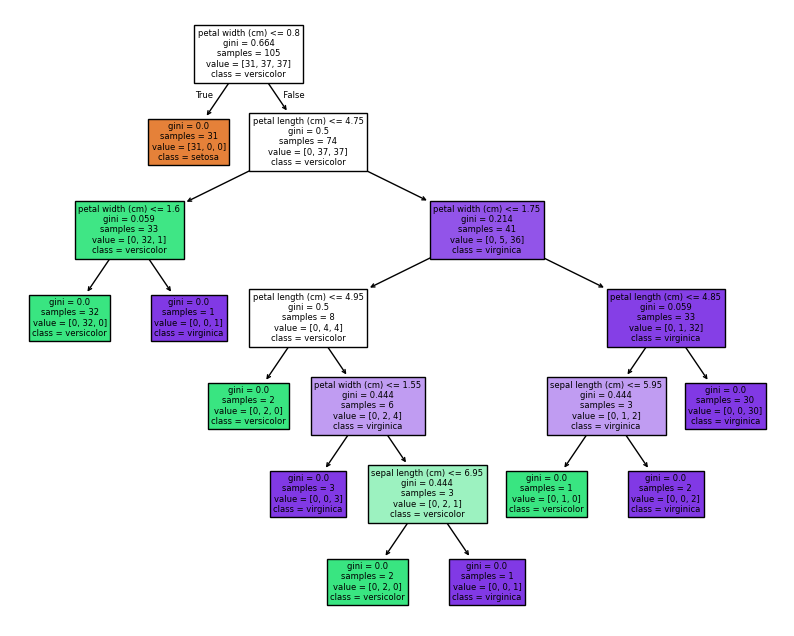

Accuracy : 1.0


In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt 

# load iris  dataset 
iris = load_iris()
X,Y = iris.data,iris.target 

#split data 
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.3 , random_state = 42 )

# Train the tree 
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)

#visualize 
plt.figure(figsize=(10,8))
tree.plot_tree(clf,feature_names = iris.feature_names,class_names = iris.target_names , filled = True )
plt.show()

# check accuracy 
print("Accuracy :",clf.score(X_test , Y_test))

In [6]:
# entropy calculation in python 
import numpy as np 
# 6 pass , 4 fail 
P = [6/10,4/10]
entropy = -sum([pi * np.log2(pi) for pi in P])
print("Entropy : ",entropy )

Entropy :  0.9709505944546686


In [8]:
# Information Gain 
# Before : entropy = 0.971 
# after split 
entropy_yes = - ((5/6)*np.log2(5/6) + (1/6)*np.log2(1/6))
entropy_no = - ((1/4)*np.log2(1/4) + (3/4)*np.log2(3/4))
weighted_entropy = (6/10 * entropy_yes) + (4/10 * entropy_no)
info_gain = 0.971 - weighted_entropy
print("Information gain : ",info_gain 
     )

Information gain :  0.2564752972273344


In [9]:
p_pass , p_fail = 0.6 , 0.4 
gini = 1 - (p_pass **2 + p_fail ** 2 )
print("Gini Index : ",gini )

clf_gini = DecisionTreeClassifier(criterion = 'gini')
clf_gini.fit(X_train, Y_train)
print("Gini Tree accuracy : ",clf_gini.score(X_test, Y_test ))

Gini Index :  0.48
Gini Tree accuracy :  1.0


CART Accuracy: 1.0


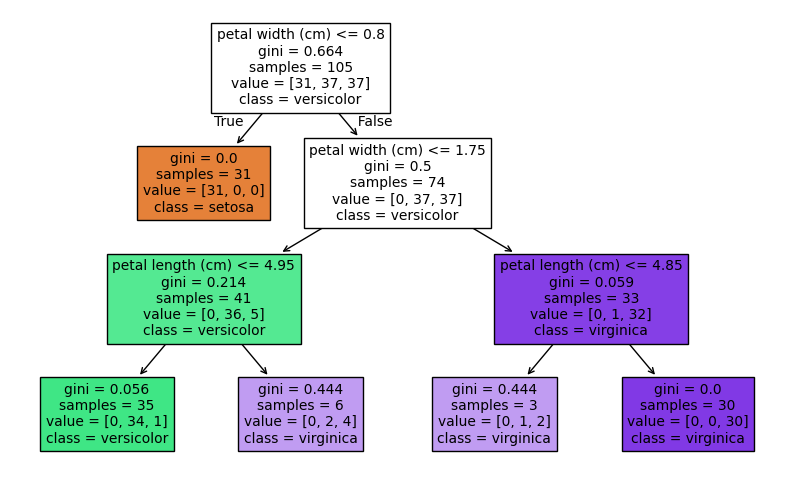

In [12]:
clf_cart = DecisionTreeClassifier(max_depth=3)
clf_cart.fit(X_train, Y_train)
print("CART Accuracy:", clf_cart.score(X_test, Y_test))

plt.figure(figsize=(10, 6))
tree.plot_tree(clf_cart, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [14]:
#chaid 
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(Y_test, y_pred, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

reg = DecisionTreeRegressor()
reg.fit(X_train, X_train[:, 0])  # Predict petal length
y_reg_pred = reg.predict(X_test)
mse = mean_squared_error(X_test[:, 0], y_reg_pred)
print("MSE (Regression):", mse)  # ~0.1

MSE (Regression): 0.004444444444444461


Pre-Pruned Accuracy: 1.0


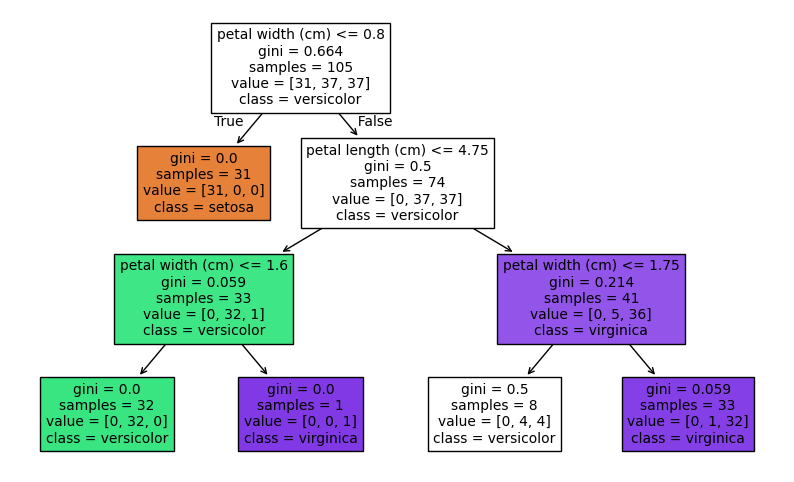

In [17]:
clf_pre = DecisionTreeClassifier(max_depth=3, min_samples_split=10)
clf_pre.fit(X_train, Y_train)
print("Pre-Pruned Accuracy:", clf_pre.score(X_test, Y_test))

plt.figure(figsize=(10, 6))
tree.plot_tree(clf_pre, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

Post-Pruned Accuracy: 1.0


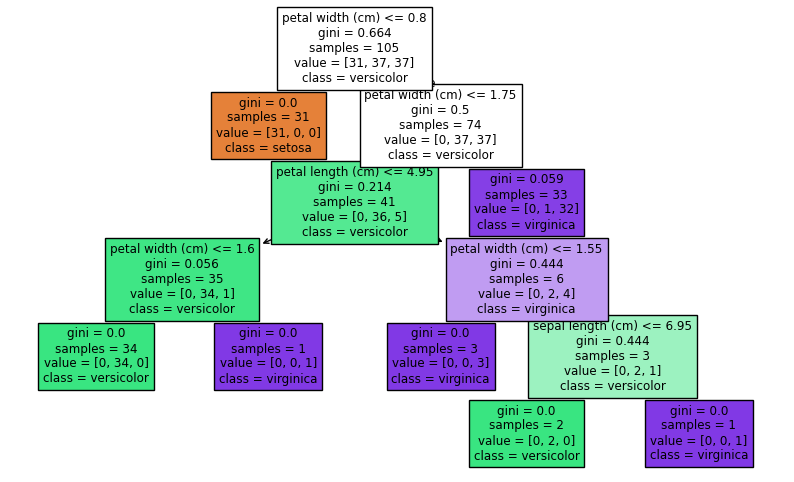

In [19]:
clf_post = DecisionTreeClassifier(ccp_alpha=0.01)
clf_post.fit(X_train, Y_train)
print("Post-Pruned Accuracy:", clf_post.score(X_test, Y_test))

plt.figure(figsize=(10, 6))
tree.plot_tree(clf_post, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

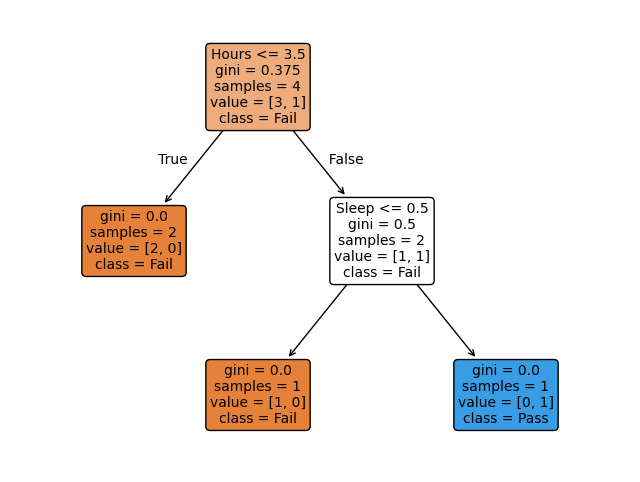

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define dataset
X_custom = [[5, 1], [5, 0], [2, 1], [1, 0]]  # Features: [Hours Studied, Sleep]
y_custom = [1, 0, 0, 0]  # Labels: Pass (1) / Fail (0)

# Initialize and train the decision tree classifier
clf_custom = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_custom.fit(X_custom, y_custom)

# Plot the decision tree
plt.figure(figsize=(8, 6))
plot_tree(
    clf_custom, 
    feature_names=["Hours", "Sleep"], 
    class_names=["Fail", "Pass"], 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.show()